In [1]:
from os import listdir

In [2]:
artist = "Slenderbodies"
dataPath = f"./Dataset/{artist}/"
lyrics = ""

for song in listdir(dataPath):
    with open(dataPath + song, mode = "r") as songFile:
        lyrics += songFile.read().lower()
        
lyrics = lyrics.split("\n")
print(f"Number of sentences: {len(lyrics)}")

Number of sentences: 1153


In [3]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lyrics)               # Generate the word index dictionary
totalWords = len(tokenizer.word_index) + 1   # With padding which is 0

print(f"Total num words: {totalWords}")
print("=====")
print("Word Index Dictionary")
print(tokenizer.word_index)

Total num words: 967
=====
Word Index Dictionary
{'i': 1, 'you': 2, 'the': 3, 'to': 4, 'my': 5, 'a': 6, 'be': 7, 'in': 8, 'all': 9, 'your': 10, "it's": 11, 'me': 12, 'it': 13, 'and': 14, 'been': 15, 'of': 16, 'away': 17, 'from': 18, 'up': 19, 'one': 20, 'stay': 21, "don't": 22, 'so': 23, 'like': 24, 'want': 25, 'on': 26, 'for': 27, 'way': 28, 'tangled': 29, 'us': 30, "i've": 31, 'that': 32, "can't": 33, 'just': 34, 'feeling': 35, 'yeah': 36, 'between': 37, 'this': 38, 'could': 39, 'back': 40, 'little': 41, 'have': 42, 'we': 43, 'belong': 44, 'down': 45, 'long': 46, 'if': 47, 'but': 48, 'senses': 49, 'time': 50, "i'm": 51, 'take': 52, 'got': 53, 'too': 54, 'wallow': 55, 'how': 56, "you're": 57, 'love': 58, 'know': 59, 'let': 60, 'better': 61, 'nothing': 62, 'maybe': 63, 'something': 64, 'still': 65, 'with': 66, 'folds': 67, 'here': 68, 'no': 69, 'seems': 70, 'feel': 71, 'pressure': 72, 'now': 73, 'our': 74, 'home': 75, 'out': 76, 'ah': 77, 'night': 78, 'end': 79, 'get': 80, 'right': 81,

In [5]:
input_sequences = []

for line in lyrics:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)
        
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = "pre"))
xs, labels = input_sequences[:,:-1] , input_sequences[:,-1]
ys = to_categorical(labels, num_classes = totalWords)

In [6]:
sentence = lyrics[0].split(" ")
print(f"Sample sentence: {sentence}")

token_list = []
for word in sentence: 
    token_list.append(tokenizer.word_index[word])

print(f"Token list: {token_list}")

print(f"\nPadded token list: {xs[0]}")
print(f"Decoded token list to text: {tokenizer.sequences_to_texts([xs[0]])}")

print(f"\nOne-hot label: {ys[0]}")
print(f"Index of label: {np.argmax(ys[0])}")
print(f"Decoded Label: {tokenizer.index_word[np.argmax(ys[0])]}")

Sample sentence: ['and', 'leaning', 'backwards']
Token list: [14, 529, 227]

Padded token list: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14]
Decoded token list to text: ['and']

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [7]:
embeddingDim = 100
lstmUnits = 200
learningRate = 0.002

model = Sequential([
          Embedding(totalWords, embeddingDim, input_length = max_sequence_len - 1),
          Bidirectional(LSTM(lstmUnits)),
          Dense(totalWords, activation = "softmax")
])

model.compile(
    loss = "categorical_crossentropy", 
    optimizer = Adam(learning_rate = learningRate), 
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 100)           96700     
                                                                 
 bidirectional (Bidirectiona  (None, 400)              481600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 967)               387767    
                                                                 
Total params: 966,067
Trainable params: 966,067
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(xs, ys, epochs = 20)

Epoch 1/20
171/171 [==============================] - 20s 82ms/step - loss: 5.8468 - accuracy: 0.0358
Epoch 2/20
171/171 [==============================] - 14s 80ms/step - loss: 4.9440 - accuracy: 0.1176
Epoch 3/20
171/171 [==============================] - 14s 80ms/step - loss: 3.9578 - accuracy: 0.2674
Epoch 4/20
171/171 [==============================] - 14s 80ms/step - loss: 3.1146 - accuracy: 0.3924
Epoch 5/20
171/171 [==============================] - 14s 80ms/step - loss: 2.4230 - accuracy: 0.4995
Epoch 6/20
171/171 [==============================] - 14s 81ms/step - loss: 1.8805 - accuracy: 0.5942
Epoch 7/20
171/171 [==============================] - 14s 80ms/step - loss: 1.4620 - accuracy: 0.6776
Epoch 8/20
171/171 [==============================] - 15s 88ms/step - loss: 1.1496 - accuracy: 0.7438
Epoch 9/20
171/171 [==============================] - 16s 92ms/step - loss: 0.9350 - accuracy: 0.7923
Epoch 10/20
171/171 [==============================] - 14s 82ms/step - loss: 0.778

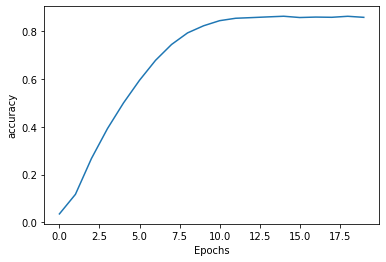

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [10]:
seed_text = "The sky's cloudy but it never rains"
next_words = 50

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = "pre")

    probabilities = model.predict(token_list)
    predicted = np.argmax(probabilities, axis = -1)[0]
    if(predicted != 0):
        output_word = tokenizer.index_word[predicted]
        seed_text += " " + output_word

1/1 [==============================] - 0s 33ms/step


In [11]:
print("=============================================== Generated Lyrics ===============================================\n")
print(seed_text)

=============================================== Generated Lyrics ===============================================

The sky's cloudy but it never rains to be leaving fine to me sitting myself to take my breath away from my own until i talk to me away you said would you follow you know you need the king that i am the one of us one of us one of us one of us one


In [13]:
print("=============================================== Final Touch ===============================================\n")
print("""
    The sky's cloudy but it never rains
    to be leaving
    fine to me
    sitting myself
    to take my breath away
    from my own
    until i talk to me away
    you said
    would you follow
    you know you need the king
    that i am the
    one of us
    one of us
    one of us
    one of us
    one
""")

=============================================== Final Touch ===============================================


    The sky's cloudy but it never rains
    to be leaving
    fine to me
    sitting myself
    to take my breath away
    from my own
    until i talk to me away
    you said
    would you follow
    you know you need the king
    that i am the
    one of us
    one of us
    one of us
    one of us
    one

